### 데이터 전처리

### <b>Q1. 중복 데이터 제거</b>
---
 - 중복된 행데이터 삭제

In [1]:
import pandas as pd
train_df = pd.read_csv('TrainDataAll.csv',delimiter=',')

In [2]:
train_df['repu'].value_counts()


repu
malicious    6735
benign       3422
Name: count, dtype: int64

In [3]:
non_numeric_cols = train_df.select_dtypes(exclude=['number']).columns.tolist()
print("숫자가 아닌 컬럼들:", non_numeric_cols)


숫자가 아닌 컬럼들: ['url_tld', 'repu']


In [4]:
train_dropstr_df = train_df.drop('url_tld',axis=1)

In [5]:
train_dropstr_df.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_num_dom_token', 'url_path_len',
       'url_filename_len', 'url_longest_dom_token_len',
       'url_average_dom_token_len', 'url_domain_len', 'url_hostname_len',
       'url_num_dots', 'url_num_underscores', 'url_num_equals',
       'url_num_slashes', 'url_num_dash', 'url_num_semicolon', 'url_num_at',
       'url_num_percent', 'url_num_plus', 'url_query_len',
       'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_count_consonants', 'url_num_digits', 'url_chinese_present',
       'url_port', 'url_has_https', 'url_has_ip_address', 'url_num_subdomains',
       'url_has_suspicious_words', 'url_length_category',
       'url_has_port_in_url', 'url_num_special_chars', 'url_num_params',
       'url_num_fragments', 'url_starts_with_www', 'url_is_shortened',
       'url_has_email', 'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_n

In [6]:
train_dropstr_df['repu'].value_counts()

repu
malicious    6735
benign       3422
Name: count, dtype: int64

In [7]:
# 중복 데이터 제거 : drop_duplicates()
train_dropstr_df=train_dropstr_df.drop_duplicates()

In [8]:
train_dropstr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9906 entries, 0 to 10156
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    9906 non-null   int64  
 1   url_num_hyphens_dom        9906 non-null   int64  
 2   url_num_dom_token          9906 non-null   int64  
 3   url_path_len               9906 non-null   int64  
 4   url_filename_len           9906 non-null   int64  
 5   url_longest_dom_token_len  9906 non-null   int64  
 6   url_average_dom_token_len  9906 non-null   float64
 7   url_domain_len             9906 non-null   int64  
 8   url_hostname_len           9906 non-null   int64  
 9   url_num_dots               9906 non-null   int64  
 10  url_num_underscores        9906 non-null   int64  
 11  url_num_equals             9906 non-null   int64  
 12  url_num_slashes            9906 non-null   int64  
 13  url_num_dash               9906 non-null   int64  
 

#### <b>텍스트와 범주형 특성 처리 실습</b>
---

In [9]:
# replace() 함수 사용
# 'benign'=1,'malicious'=-1 처리
train_dropstr_df['repu'].replace({'benign':1,'malicious':0}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3076\3730781815.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_dropstr_df['repu'].replace({'benign':1,'malicious':0}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3076\3730781815.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tra

In [10]:
train_dropstr_df['repu'].unique()

array([1, 0], dtype=int64)

In [11]:
train_dropstr_df.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_num_dom_token', 'url_path_len',
       'url_filename_len', 'url_longest_dom_token_len',
       'url_average_dom_token_len', 'url_domain_len', 'url_hostname_len',
       'url_num_dots', 'url_num_underscores', 'url_num_equals',
       'url_num_slashes', 'url_num_dash', 'url_num_semicolon', 'url_num_at',
       'url_num_percent', 'url_num_plus', 'url_query_len',
       'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_count_consonants', 'url_num_digits', 'url_chinese_present',
       'url_port', 'url_has_https', 'url_has_ip_address', 'url_num_subdomains',
       'url_has_suspicious_words', 'url_length_category',
       'url_has_port_in_url', 'url_num_special_chars', 'url_num_params',
       'url_num_fragments', 'url_starts_with_www', 'url_is_shortened',
       'url_has_email', 'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_n

### <b>Q3. 결측치 제거</b>
---

In [12]:
train_dropstr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9906 entries, 0 to 10156
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    9906 non-null   int64  
 1   url_num_hyphens_dom        9906 non-null   int64  
 2   url_num_dom_token          9906 non-null   int64  
 3   url_path_len               9906 non-null   int64  
 4   url_filename_len           9906 non-null   int64  
 5   url_longest_dom_token_len  9906 non-null   int64  
 6   url_average_dom_token_len  9906 non-null   float64
 7   url_domain_len             9906 non-null   int64  
 8   url_hostname_len           9906 non-null   int64  
 9   url_num_dots               9906 non-null   int64  
 10  url_num_underscores        9906 non-null   int64  
 11  url_num_equals             9906 non-null   int64  
 12  url_num_slashes            9906 non-null   int64  
 13  url_num_dash               9906 non-null   int64  
 

In [13]:
# 결측치 제거
# dropna()

train_dropna_df = train_dropstr_df.dropna(axis=0).reset_index(drop=True)

In [14]:
train_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    9906 non-null   int64  
 1   url_num_hyphens_dom        9906 non-null   int64  
 2   url_num_dom_token          9906 non-null   int64  
 3   url_path_len               9906 non-null   int64  
 4   url_filename_len           9906 non-null   int64  
 5   url_longest_dom_token_len  9906 non-null   int64  
 6   url_average_dom_token_len  9906 non-null   float64
 7   url_domain_len             9906 non-null   int64  
 8   url_hostname_len           9906 non-null   int64  
 9   url_num_dots               9906 non-null   int64  
 10  url_num_underscores        9906 non-null   int64  
 11  url_num_equals             9906 non-null   int64  
 12  url_num_slashes            9906 non-null   int64  
 13  url_num_dash               9906 non-null   int64

### <b>Q4. 데이터 탐색을 통한 불필요한 칼럼 제거</b>
---
- ex) 그래프, 데이터 상관관계 corr()등 활용
- corr() 메서드 : 모든 특성 간의 표준 상관계수(피어슨의 R)
  - 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법
  - r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 
- scatter 그래프를 활용한 데이터 분석

In [15]:
#train_df.drop(columns=["Unnamed: 0"],inplace=True)

In [16]:
train_dropna_df.corr()

,url_len,url_num_hyphens_dom,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_domain_len,url_hostname_len,url_num_dots,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),repu
url_len,1.000000,0.015434,0.232457,0.512924,0.258090,0.133889,0.154463,0.197311,0.197043,0.670955,...,-0.002294,-0.054251,0.000578,-0.061660,0.004196,0.007139,-0.025640,-0.046518,-0.007066,-0.149365
url_num_hyphens_dom,0.015434,1.000000,0.292736,-0.201299,-0.111591,0.682589,0.577031,0.655830,0.656380,0.085313,...,-0.059628,-0.095756,-0.010402,-0.104620,0.003705,-0.009487,-0.024338,-0.039207,-0.012002,-0.350704
url_num_dom_token,0.232457,0.292736,1.000000,0.004414,-0.039515,0.439316,0.244751,0.697636,0.697665,0.402211,...,-0.008555,-0.077319,-0.000011,-0.087008,0.009456,0.011930,-0.012935,-0.070379,-0.017236,-0.197668
url_path_len,0.512924,-0.201299,0.004414,1.000000,0.550901,-0.144814,-0.105009,-0.120930,-0.120775,0.055601,...,0.077045,0.046248,0.013151,0.033138,0.037502,0.024013,-0.011969,-0.024000,0.005566,0.145597
url_filename_len,0.258090,-0.111591,-0.039515,0.550901,1.000000,-0.135469,-0.131215,-0.117367,-0.117235,0.045118,...,0.033764,0.060680,0.012424,0.050136,0.020487,0.002113,-0.004189,-0.000281,-0.000248,0.214256
url_longest_dom_token_len,0.133889,0.682589,0.439316,-0.144814,-0.135469,1.000000,0.867237,0.919645,0.920003,0.108900,...,-0.044909,-0.145299,-0.011343,-0.149022,0.003533,-0.012397,-0.041012,-0.070255,-0.017095,-0.458227
url_average_dom_token_len,0.154463,0.577031,0.244751,-0.105009,-0.131215,0.867237,1.000000,0.792490,0.792524,0.042795,...,-0.011790,-0.170449,-0.011046,-0.176195,0.043209,-0.013409,-0.045600,-0.087822,-0.018878,-0.549979
url_domain_len,0.197311,0.655830,0.697636,-0.120930,-0.117367,0.919645,0.792490,1.000000,0.999932,0.241119,...,-0.039732,-0.149068,-0.010211,-0.152825,0.002665,-0.007541,-0.036306,-0.078122,-0.017100,-0.441685
url_hostname_len,0.197043,0.656380,0.697665,-0.120775,-0.117235,0.920003,0.792524,0.999932,1.000000,0.240948,...,-0.039666,-0.149122,-0.010202,-0.152835,0.002760,-0.007537,-0.036347,-0.078132,-0.017098,-0.441696
url_num_dots,0.670955,0.085313,0.402211,0.055601,0.045118,0.108900,0.042795,0.241119,0.240948,1.000000,...,-0.043168,-0.056232,-0.002782,-0.055663,-0.025107,0.002261,-0.013662,-0.031454,-0.008052,-0.144858


In [17]:
train_dropna_df.corr()['repu'].sort_values(ascending=False)

repu                         1.000000
html_num_tags('script')      0.376377
html_num_tags('div')         0.313193
url_starts_with_www          0.267041
html_num_tags('a')           0.262090
html_num_tags('span')        0.238719
url_num_dash                 0.222113
url_filename_len             0.214256
url_path_len                 0.145597
html_num_tags('form')        0.098546
html_num_tags('iframe')      0.086285
html_num_tags('video')       0.079949
url_has_https                0.074447
html_num_tags('img')         0.050566
url_num_plus                 0.042132
html_num_tags('small')       0.034176
html_num_tags('object')      0.025095
html_num_tags('input')       0.018869
html_num_tags('audio')       0.016509
html_num_tags('embed')      -0.008722
html_num_tags('applet')     -0.012341
url_length_category         -0.013660
url_num_fragments           -0.017863
url_has_port_in_url         -0.020979
url_port                    -0.020979
url_num_percent             -0.040272
url_num_unde

In [18]:
train_dropna_df = train_dropna_df.drop(['url_chinese_present'],axis=1)

In [19]:
#train_dropnan_df['url_chinese_present']

#### <b>scatter 그래프를 활용한 데이터 분석 실습</b>
---

In [20]:
import matplotlib.pyplot as plt

In [21]:
# 1 = 'blue',-1 = 'red' 처리
train_dropna_df['color'] = train_dropna_df['repu'].map({1:"blue", 0:"red"})

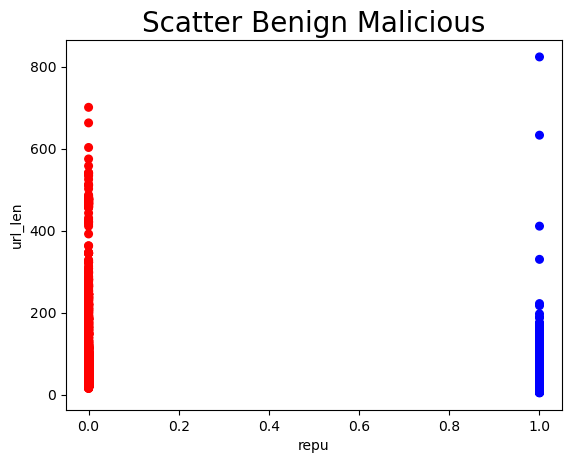

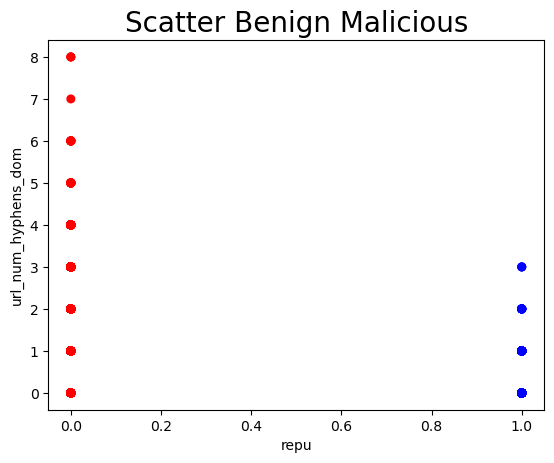

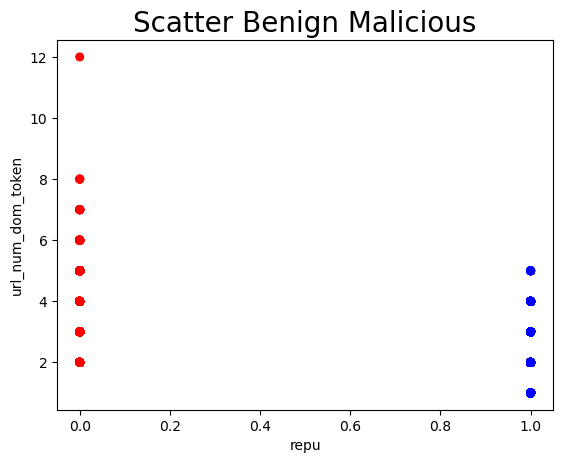

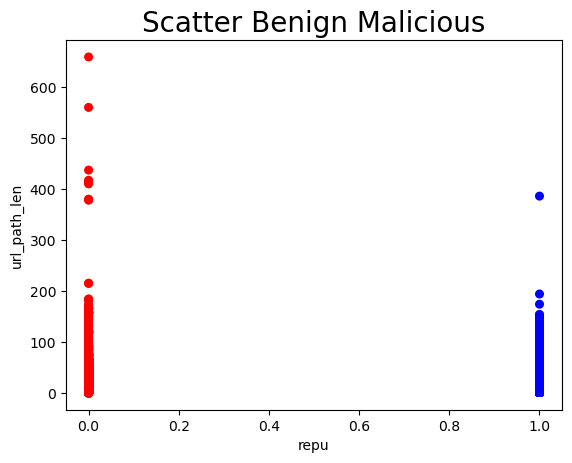

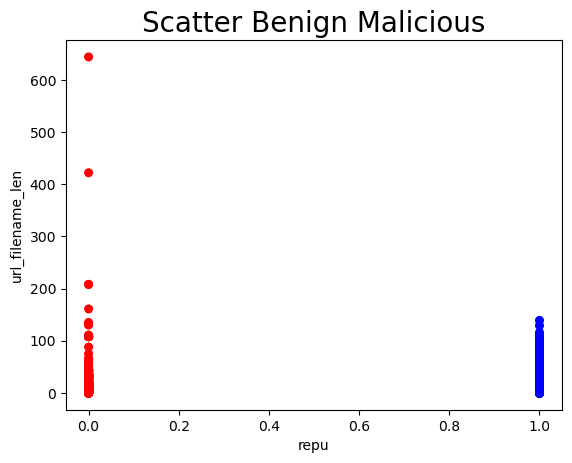

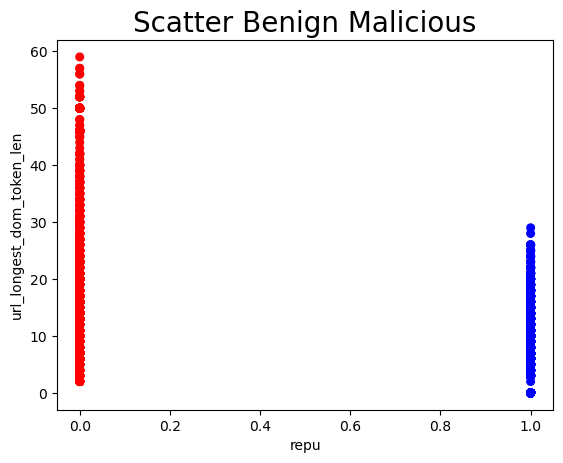

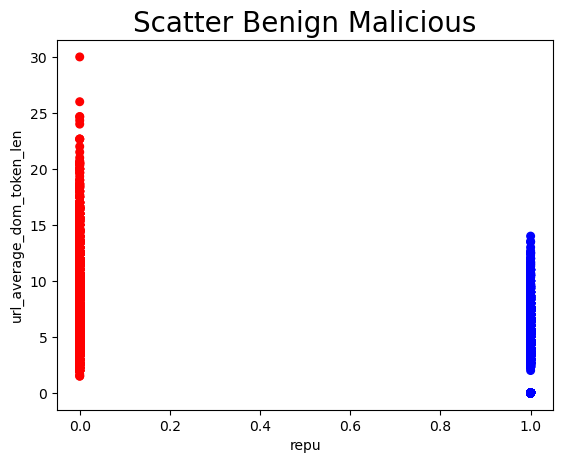

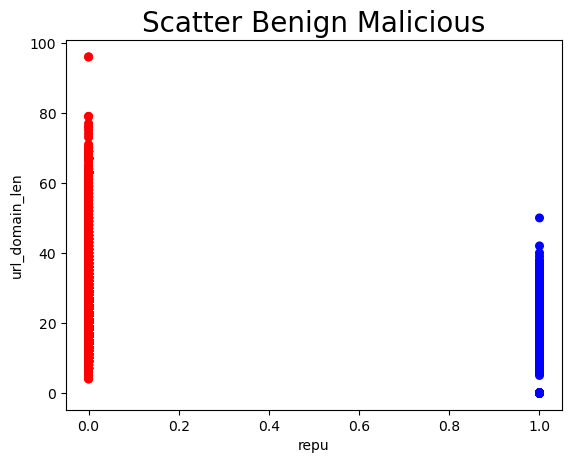

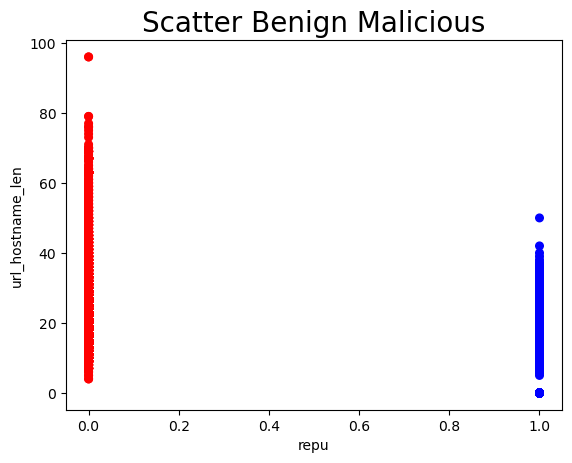

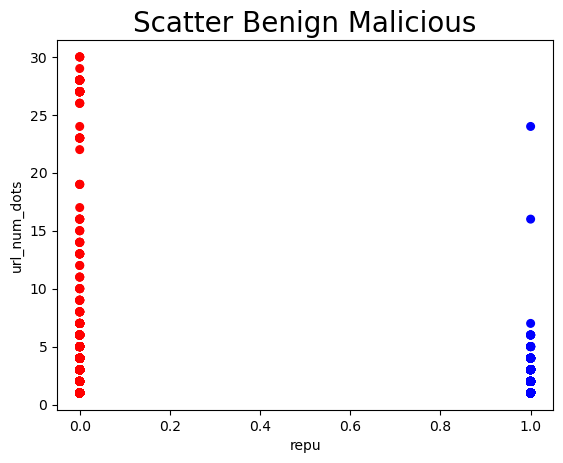

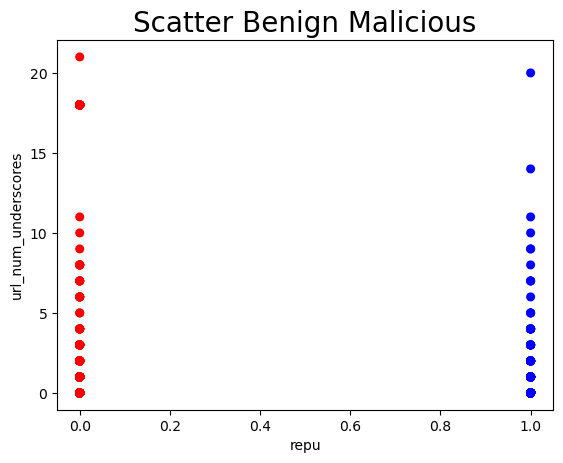

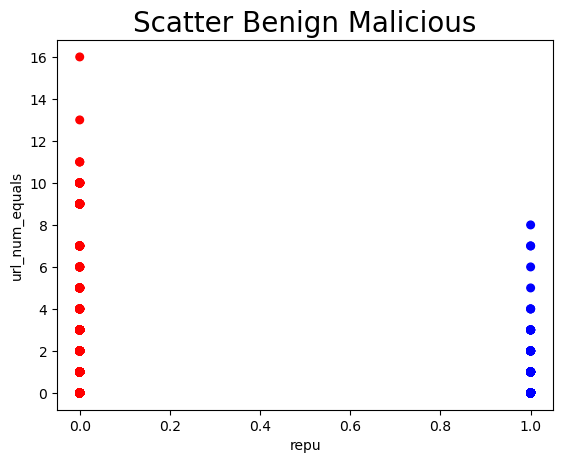

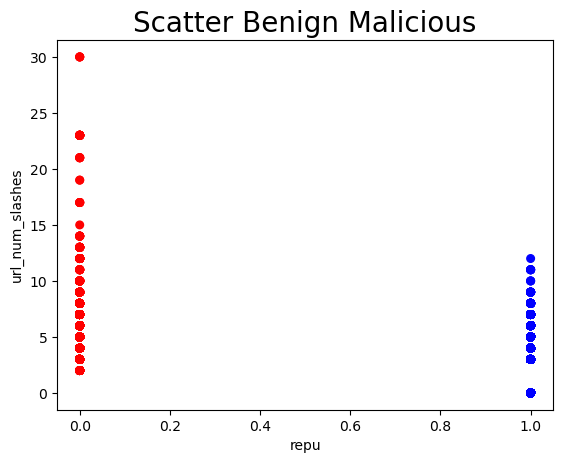

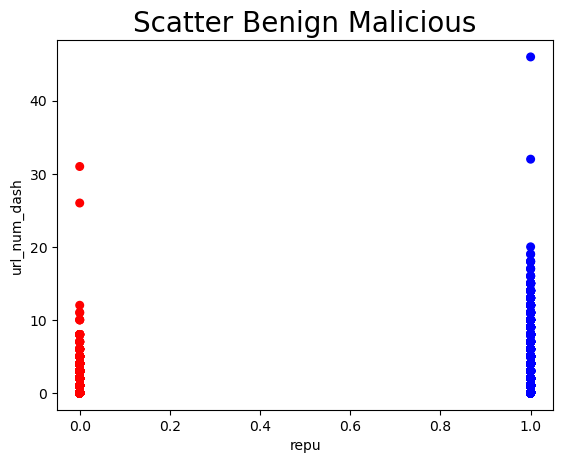

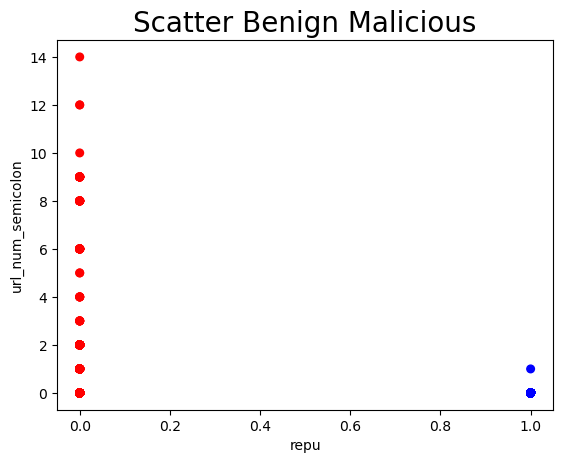

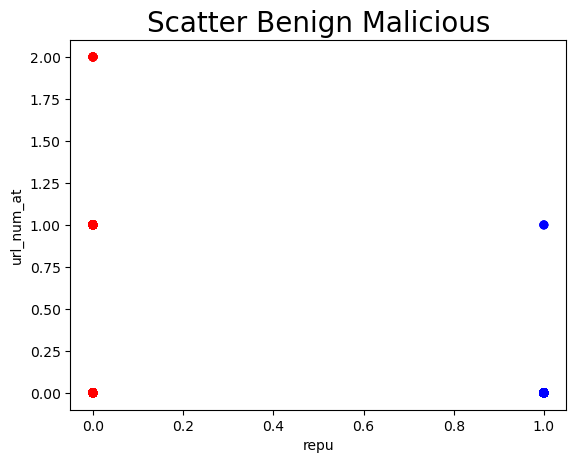

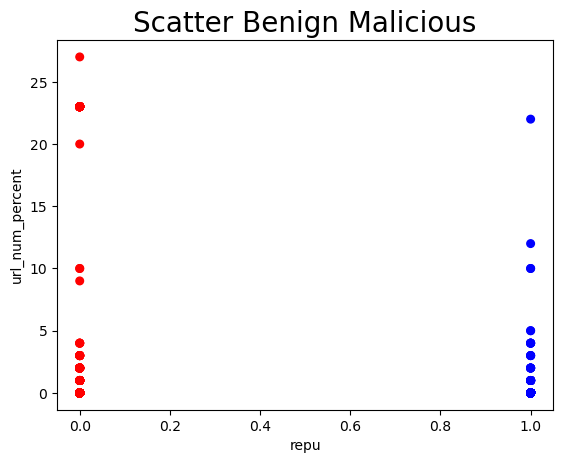

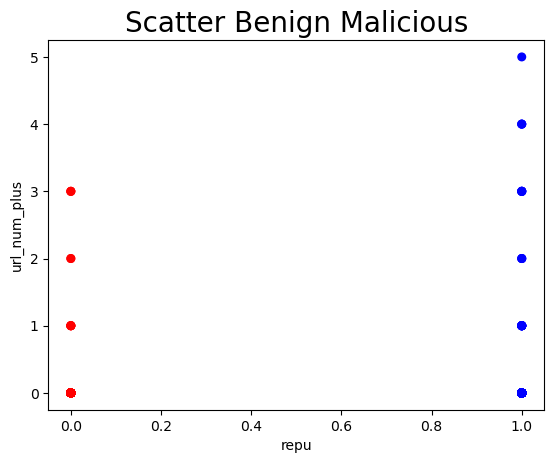

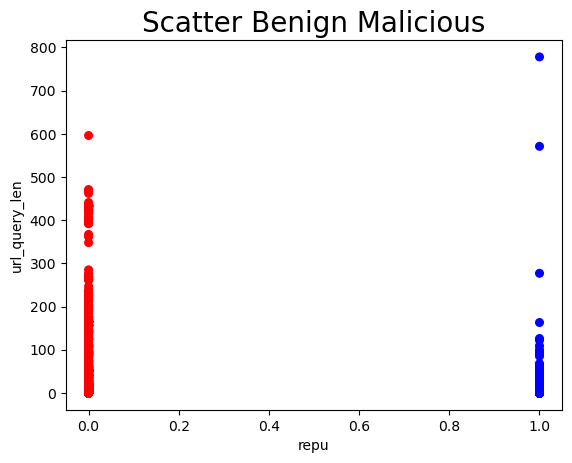

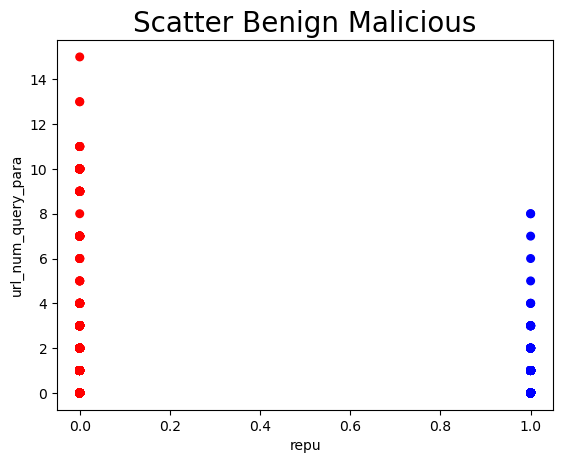

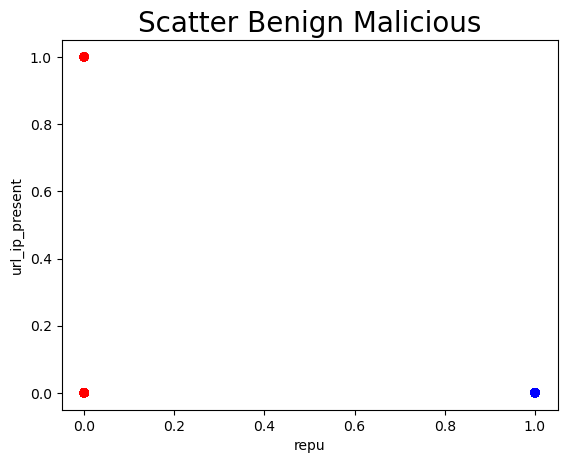

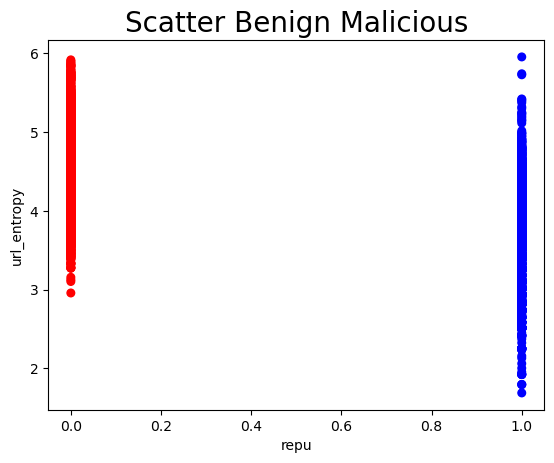

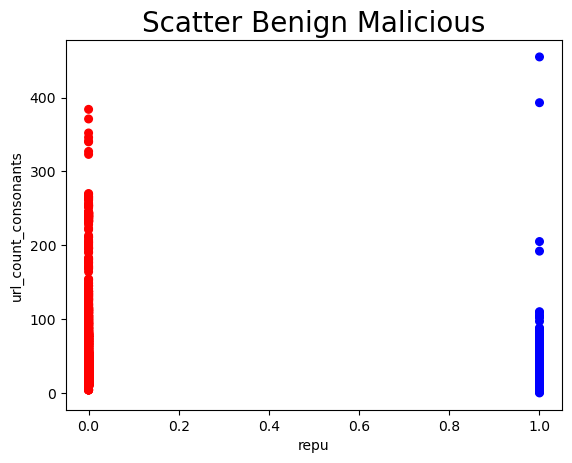

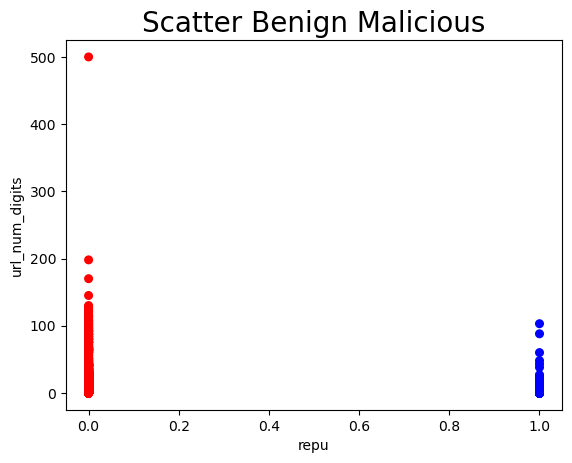

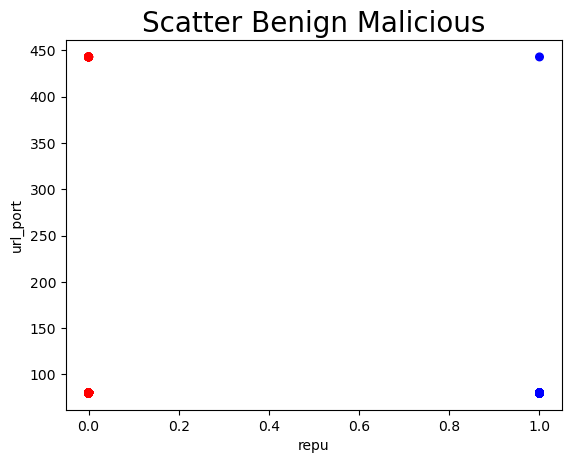

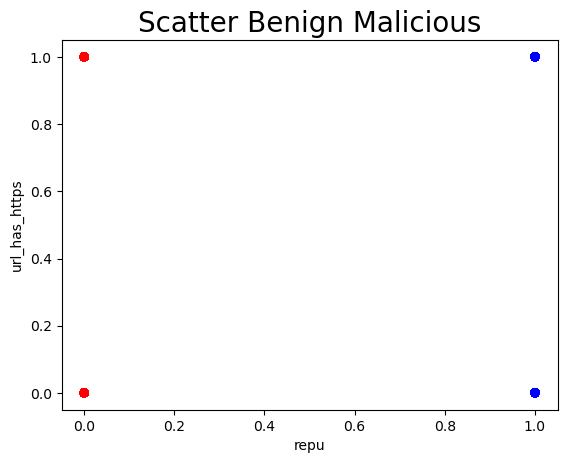

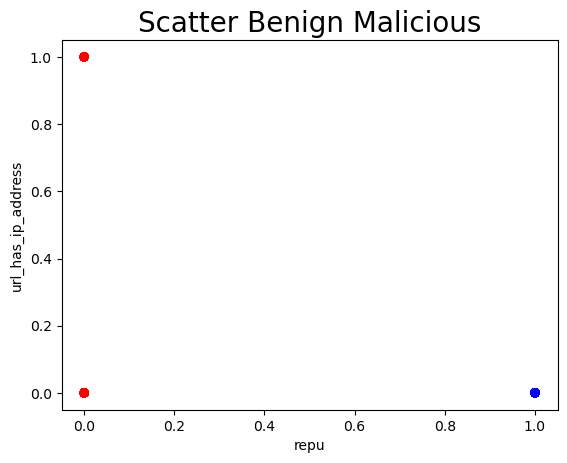

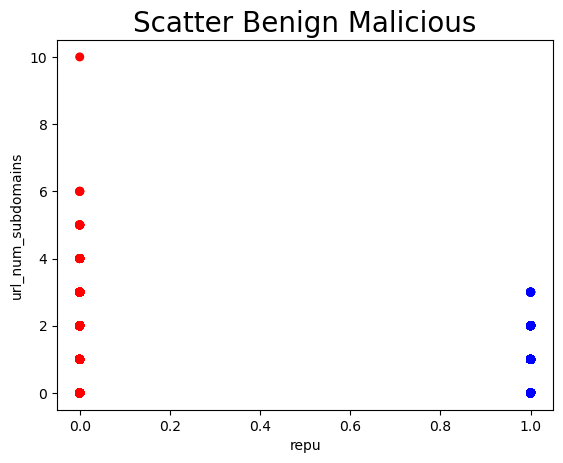

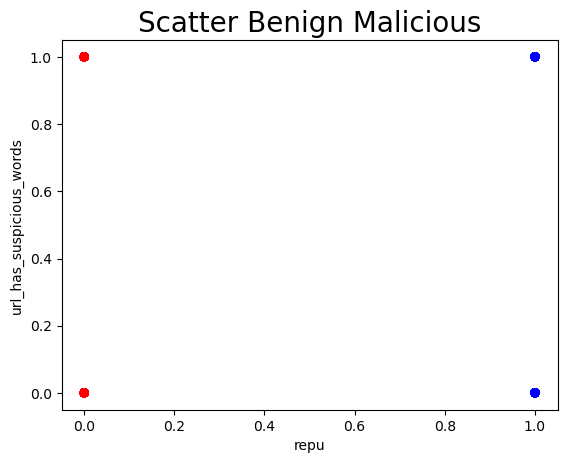

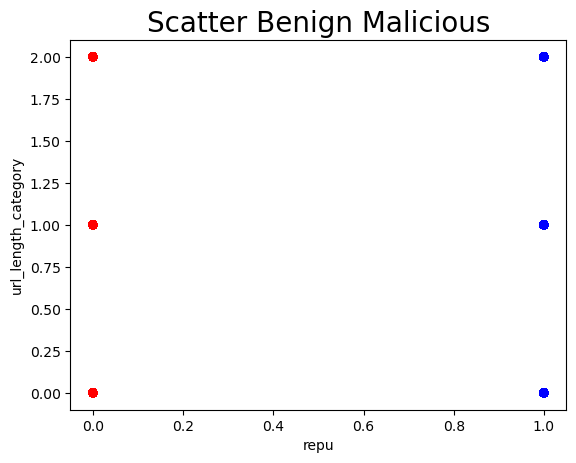

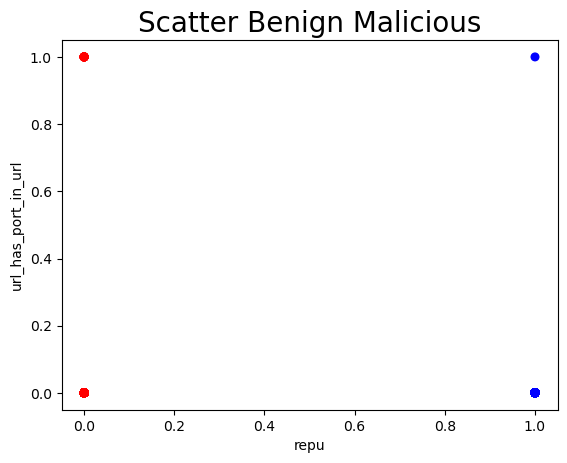

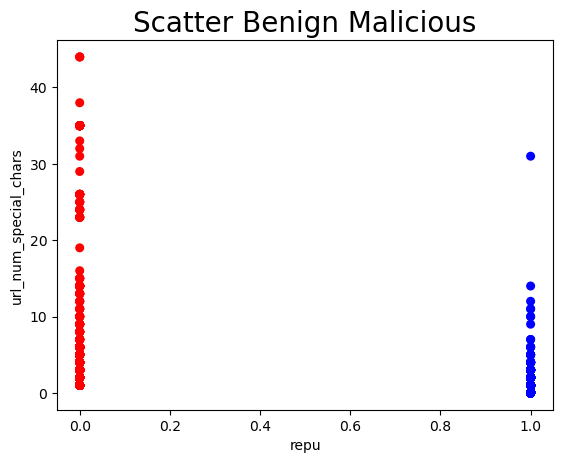

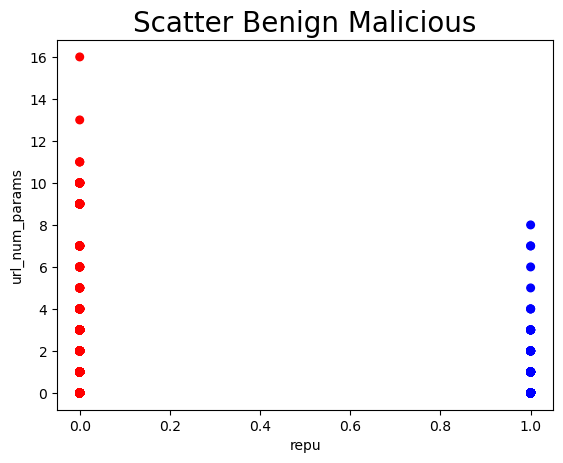

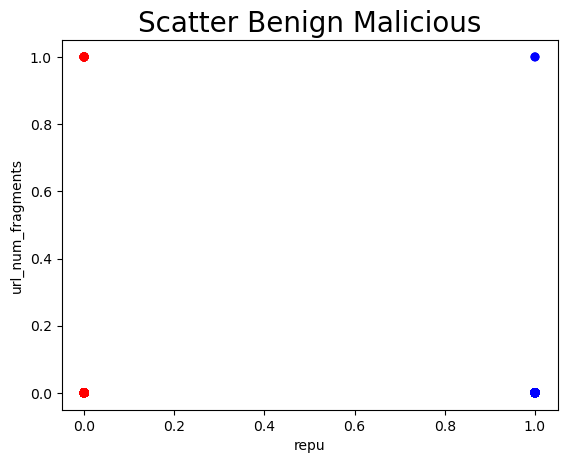

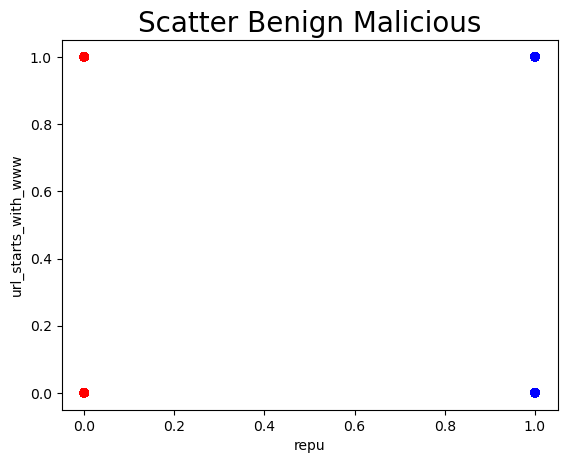

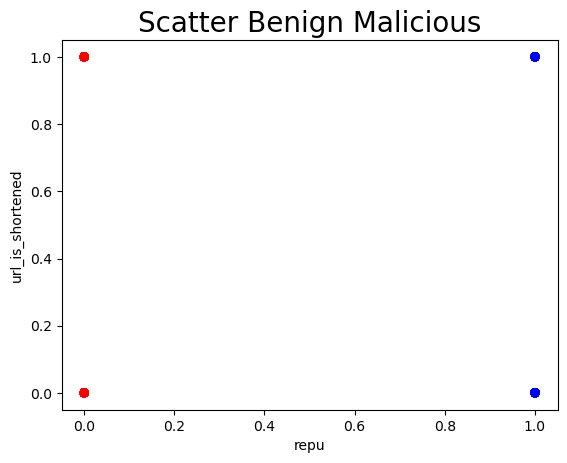

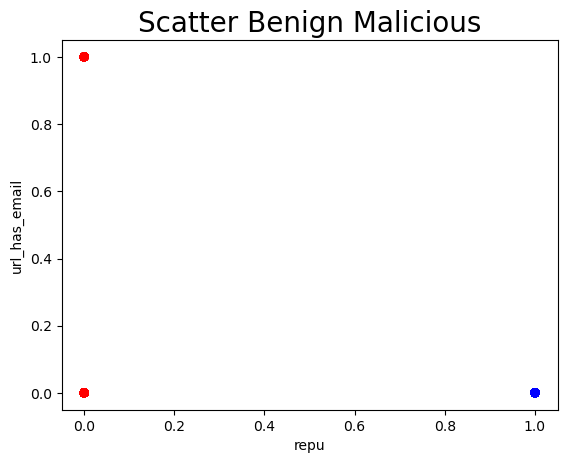

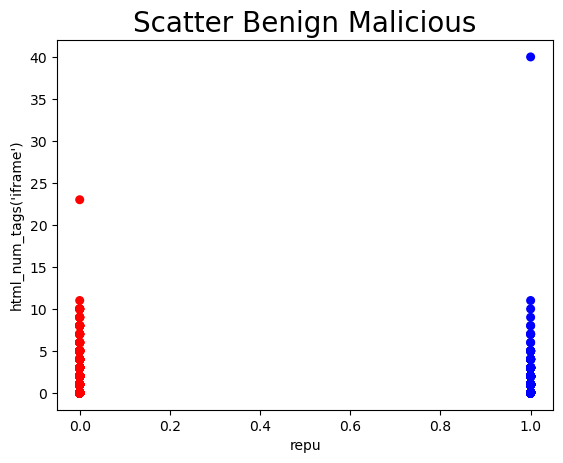

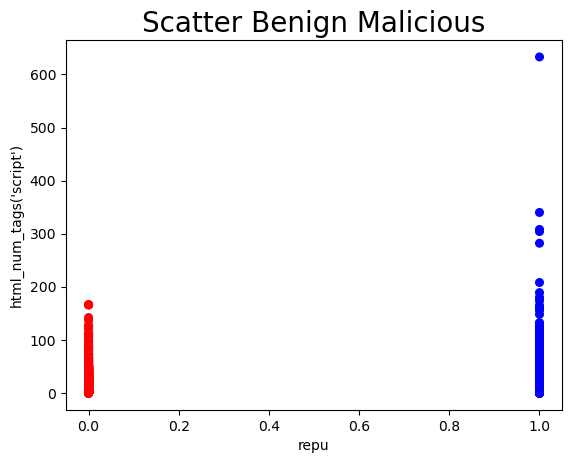

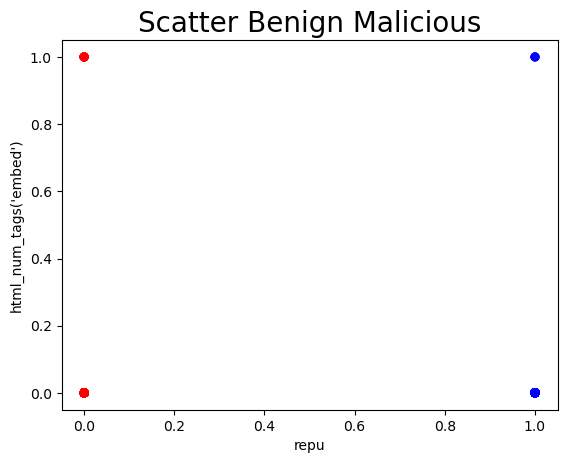

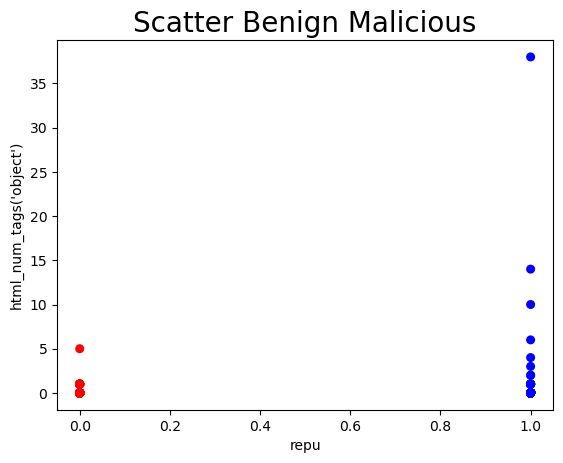

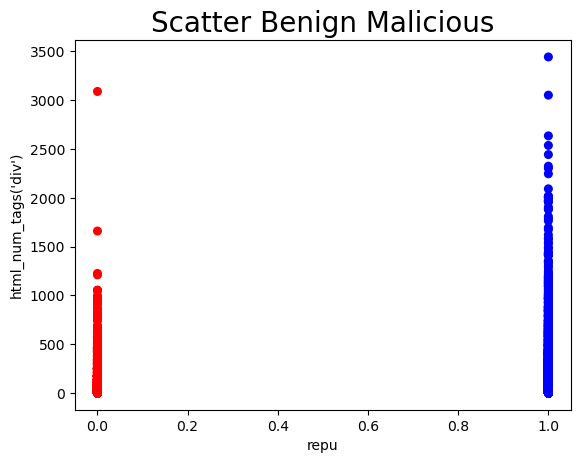

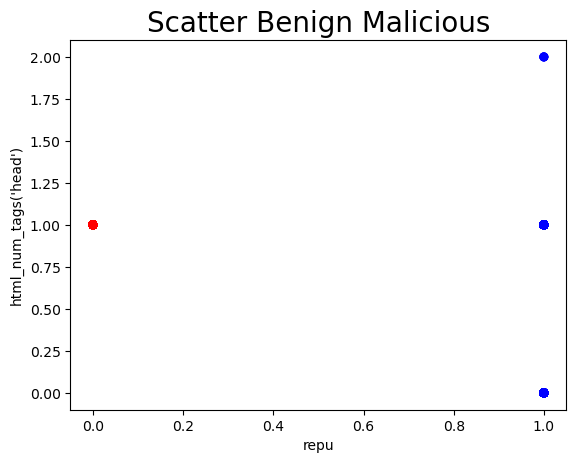

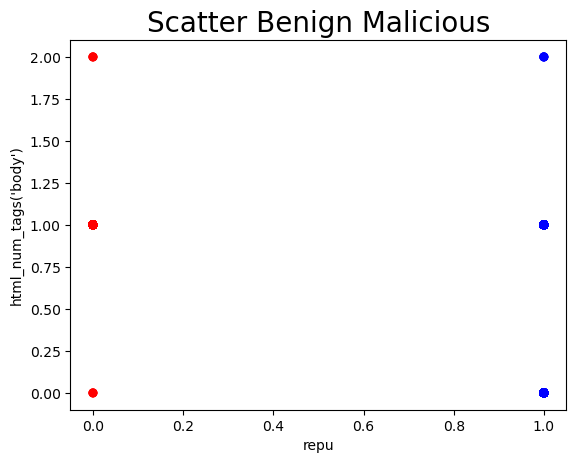

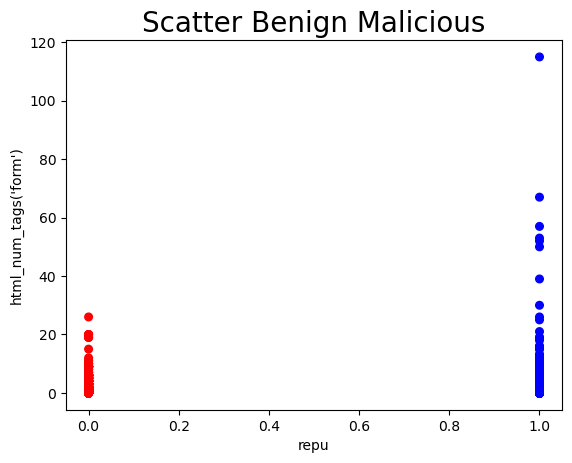

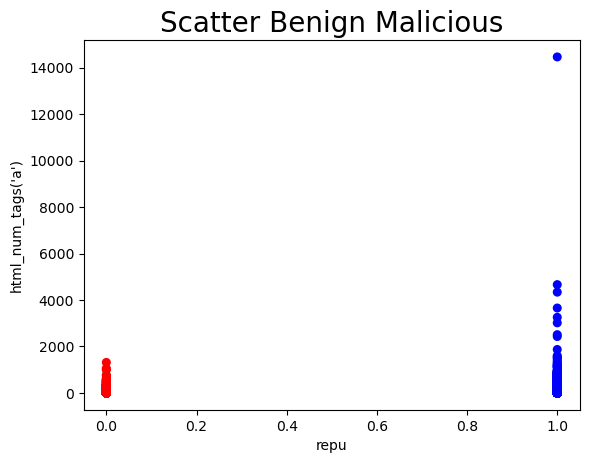

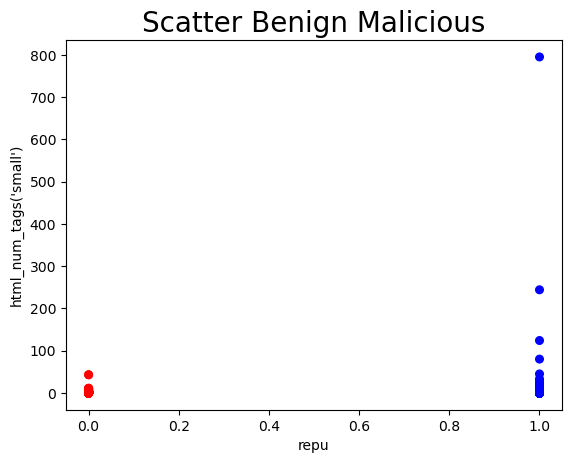

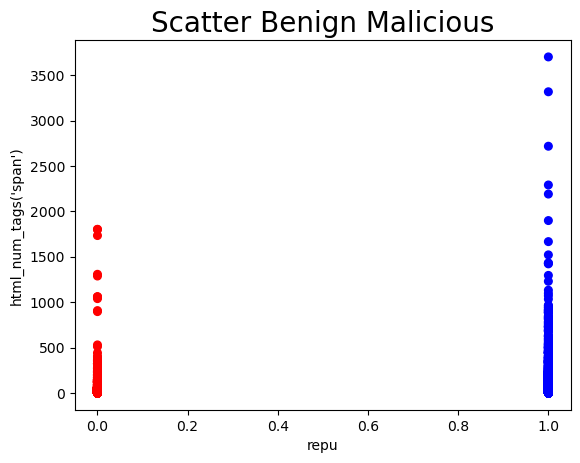

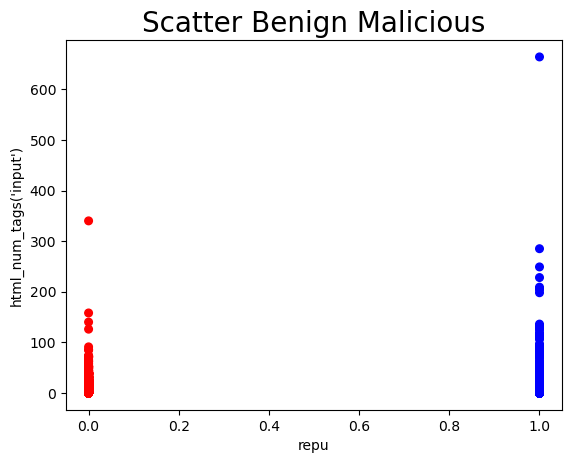

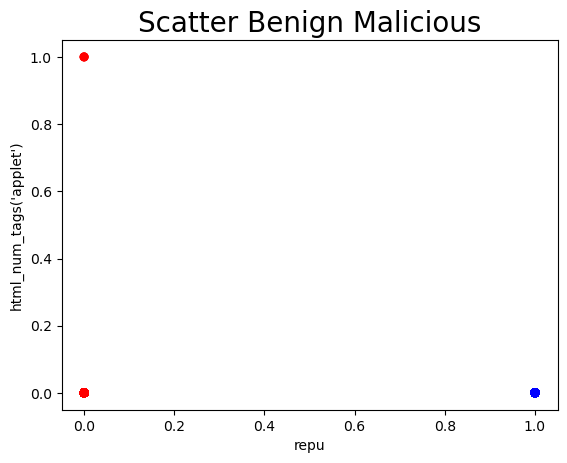

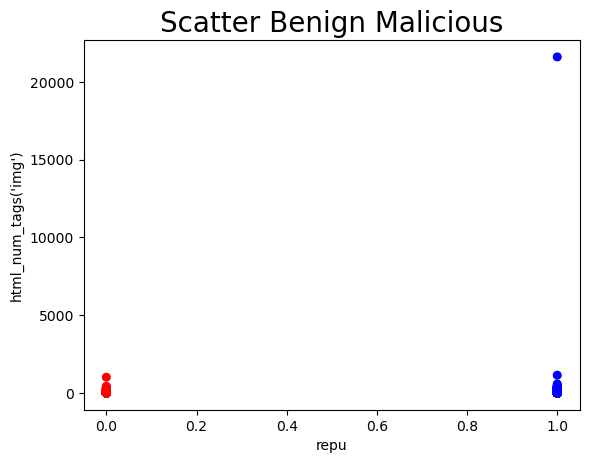

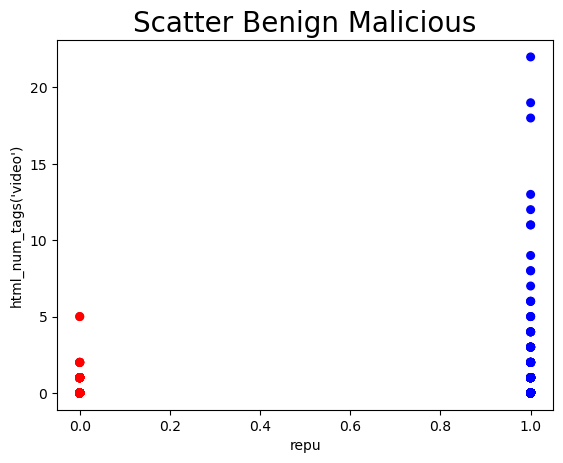

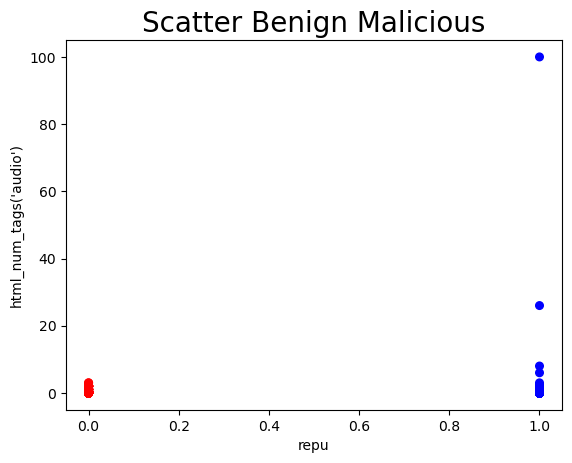

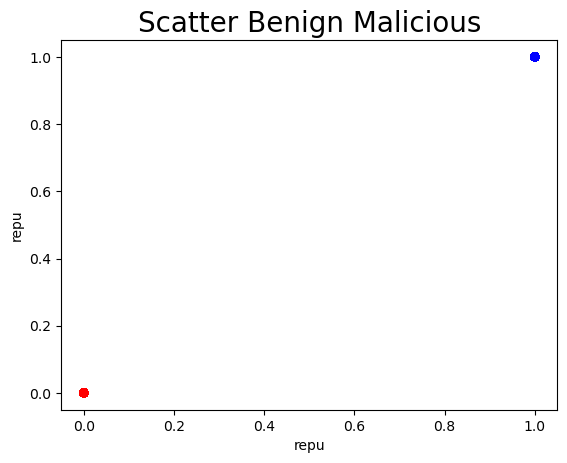

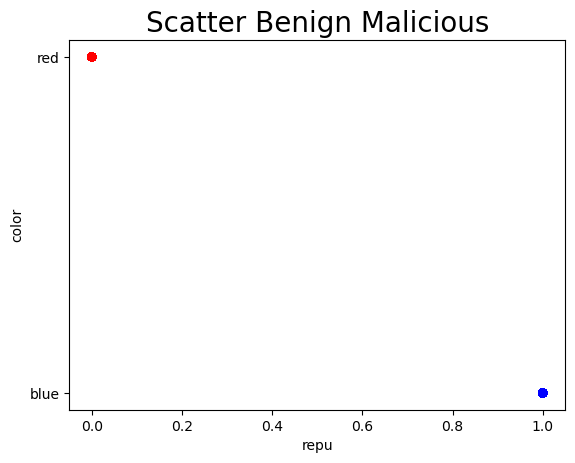

In [22]:
y_list = train_dropna_df.columns

for i in range(0, len(y_list)):
    train_dropna_df.plot(kind='scatter',x='repu',y=y_list[i],s=30, c=train_dropna_df['color'])
    plt.title('Scatter Benign Malicious', fontsize=20)
    plt.xlabel('repu')
    plt.ylabel(y_list[i])
    plt.show()

#### <b>불필요한 컬럼 제거</b>
---

In [23]:
train_dropna_df.drop(columns=["color"],inplace=True)

In [24]:
train_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    9906 non-null   int64  
 1   url_num_hyphens_dom        9906 non-null   int64  
 2   url_num_dom_token          9906 non-null   int64  
 3   url_path_len               9906 non-null   int64  
 4   url_filename_len           9906 non-null   int64  
 5   url_longest_dom_token_len  9906 non-null   int64  
 6   url_average_dom_token_len  9906 non-null   float64
 7   url_domain_len             9906 non-null   int64  
 8   url_hostname_len           9906 non-null   int64  
 9   url_num_dots               9906 non-null   int64  
 10  url_num_underscores        9906 non-null   int64  
 11  url_num_equals             9906 non-null   int64  
 12  url_num_slashes            9906 non-null   int64  
 13  url_num_dash               9906 non-null   int64

## Q5. train_test_split을 이용하여, train_x, val_x, train_y, val_y로 데이터 분리
---

- test_size = 0.3
- random_state = 2021

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# X = train_df.iloc[:,0:len(train_df.columns)-1].values
# y = train_df.iloc[:,len(train_df.columns)-1].values

In [27]:
X = train_dropna_df.drop('repu',axis=1)
y = train_dropna_df['repu']

In [28]:
# train_test_split 사용
train_x, val_x, train_y, val_y = train_test_split(X, y,test_size=0.3,random_state=2021) 

In [29]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((6934, 53), (2972, 53), (6934,), (2972,))

### AI모델링

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### <b>Confusion Matrix 함수 정의</b>
---

- Confusion Matrix란?
 - Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표
 - 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
 
 


In [31]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [32]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### 정규화
머신러닝 모델에서는 성능이 오히려 떨어져서 정규화 적용 X

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x_scaled = scaler.fit_transform(train_x)
val_x_scaled = scaler.transform(val_x)

### <b> Q2. DecisonTree 모델

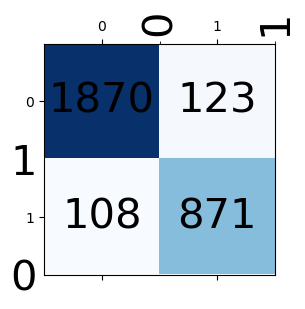

In [ ]:
# 1. import
from sklearn.tree import DecisionTreeClassifier
# 2.선언
dtc = DecisionTreeClassifier()

# 3. fit()
dtc.fit(train_x,train_y)

# 3. predict()
dtc_pred = dtc.predict(val_x)

# train 및 val 데이터 정확도 확인 : score()
print(dtc.score(train_x, train_y), dtc.score(val_x, val_y))

#Confusion Matrix 확인
confusion = confusion_matrix(val_y, dtc_pred)
fig, ax = plt.subplots(figsize=(10,3))

def plot_confusion_matrix(ax, cm, fontsize=14):
    labels = [str(i) for i in range(len(cm))]

    ax.matshow(cm, cmap='Blues')

    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', fontsize=fontsize)

    # 축 위치 설정
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)

    # ✅ rotation 값을 숫자로!
    ax.set_xticklabels(labels, rotation=90, fontsize=fontsize, minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    ax.tick_params(which="minor", bottom=False, left=False)
plot_confusion_matrix(ax, confusion, fontsize=30)





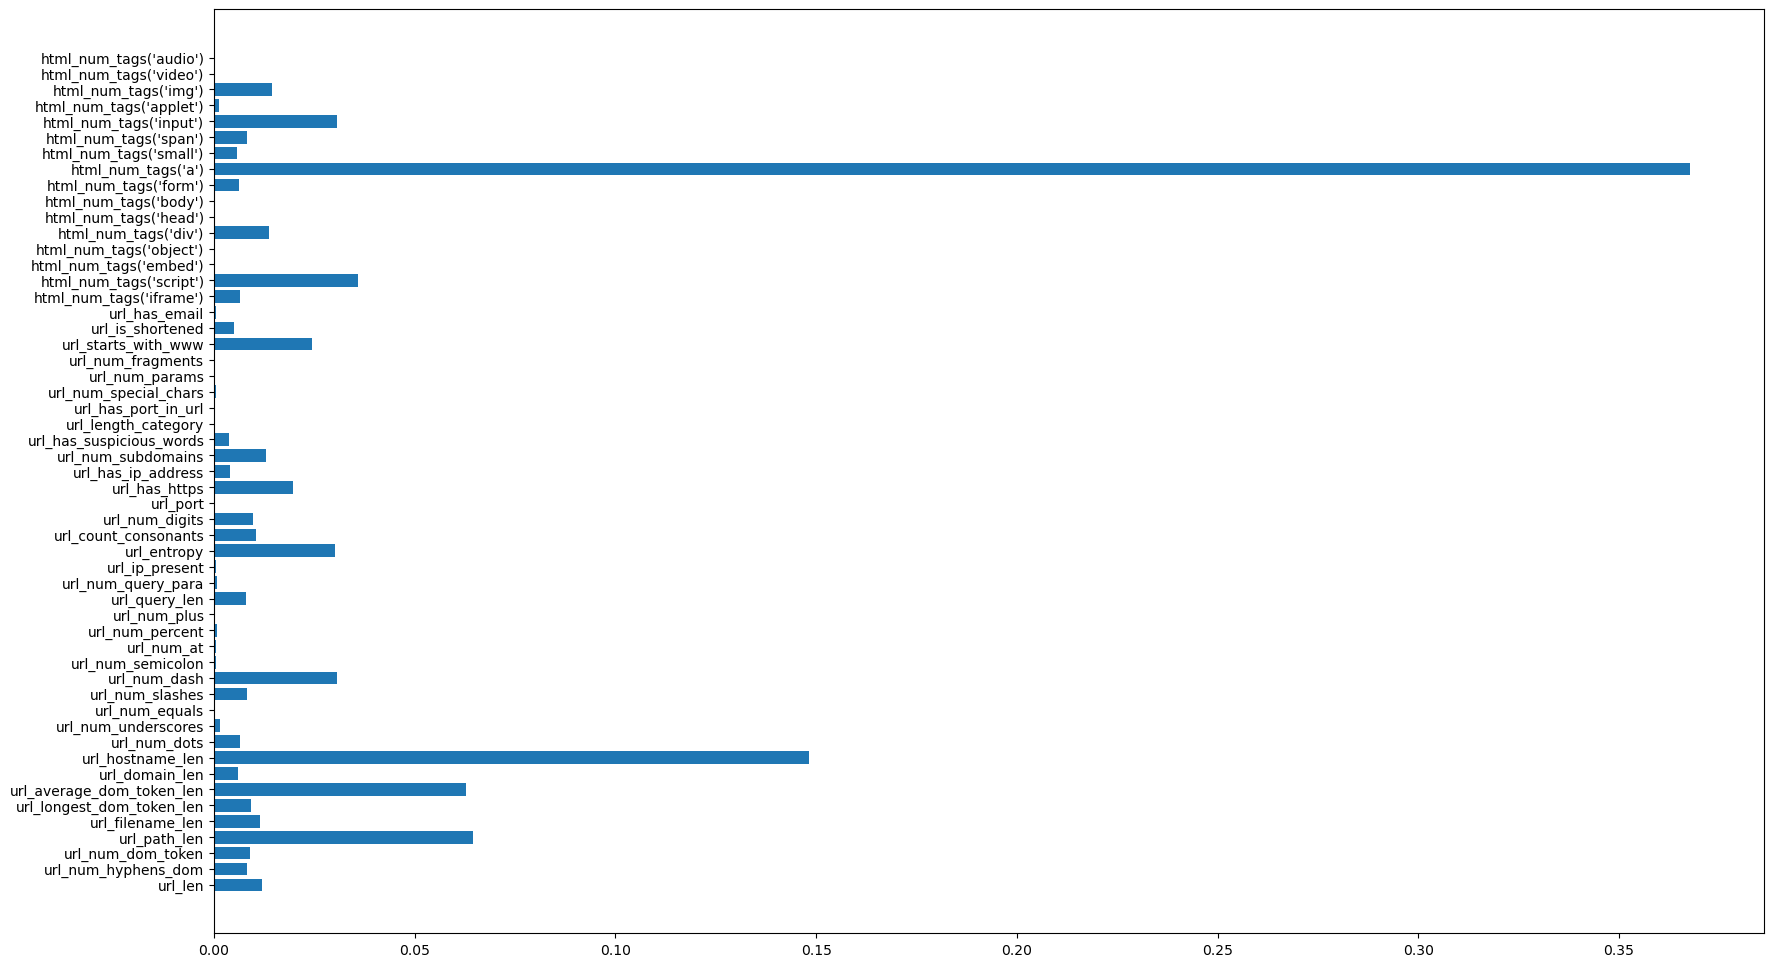

In [35]:
plt.figure(figsize=(20,12))
plt.barh(y=train_dropna_df.columns[:-1],
        width = dtc.feature_importances_)
plt.show()

### <b>앙상블(Ensemble)</b>

## Random Forest 모델

1.0 0.946164199192463


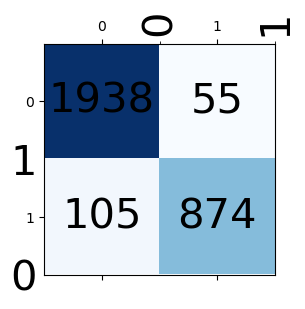

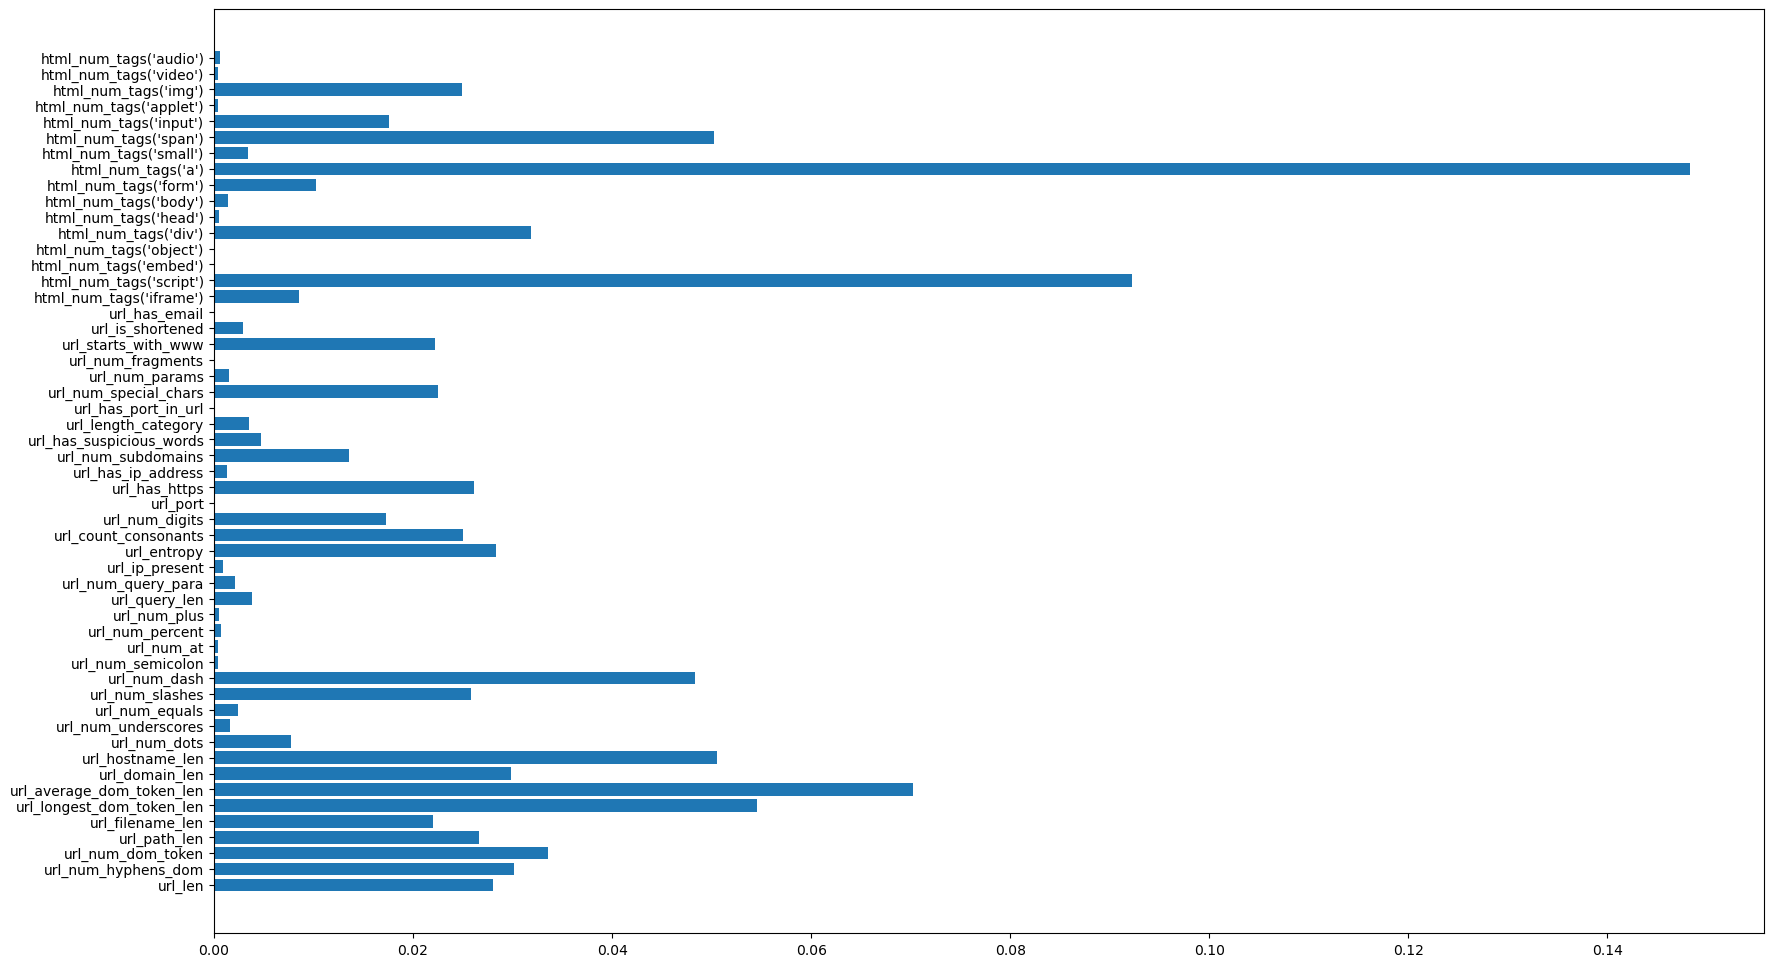

In [36]:
# 1. import
from sklearn.ensemble import RandomForestClassifier
# 2.선언
rfc = RandomForestClassifier()

# 3. fit()
rfc.fit(train_x,train_y)

# 3. predict()
rfc_pred = rfc.predict(val_x)

# train 및 val 데이터 정확도 확인 :score()
print(rfc.score(train_x, train_y), rfc.score(val_x, val_y))

# Confusion Matrix 확인
confusion = confusion_matrix(val_y, rfc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_dropna_df.columns[:-1],
        width = rfc.feature_importances_)
plt.show()

### <b> Gradient Boost 모델

0.9564464955292761 0.9367429340511441


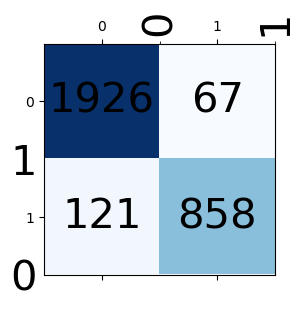

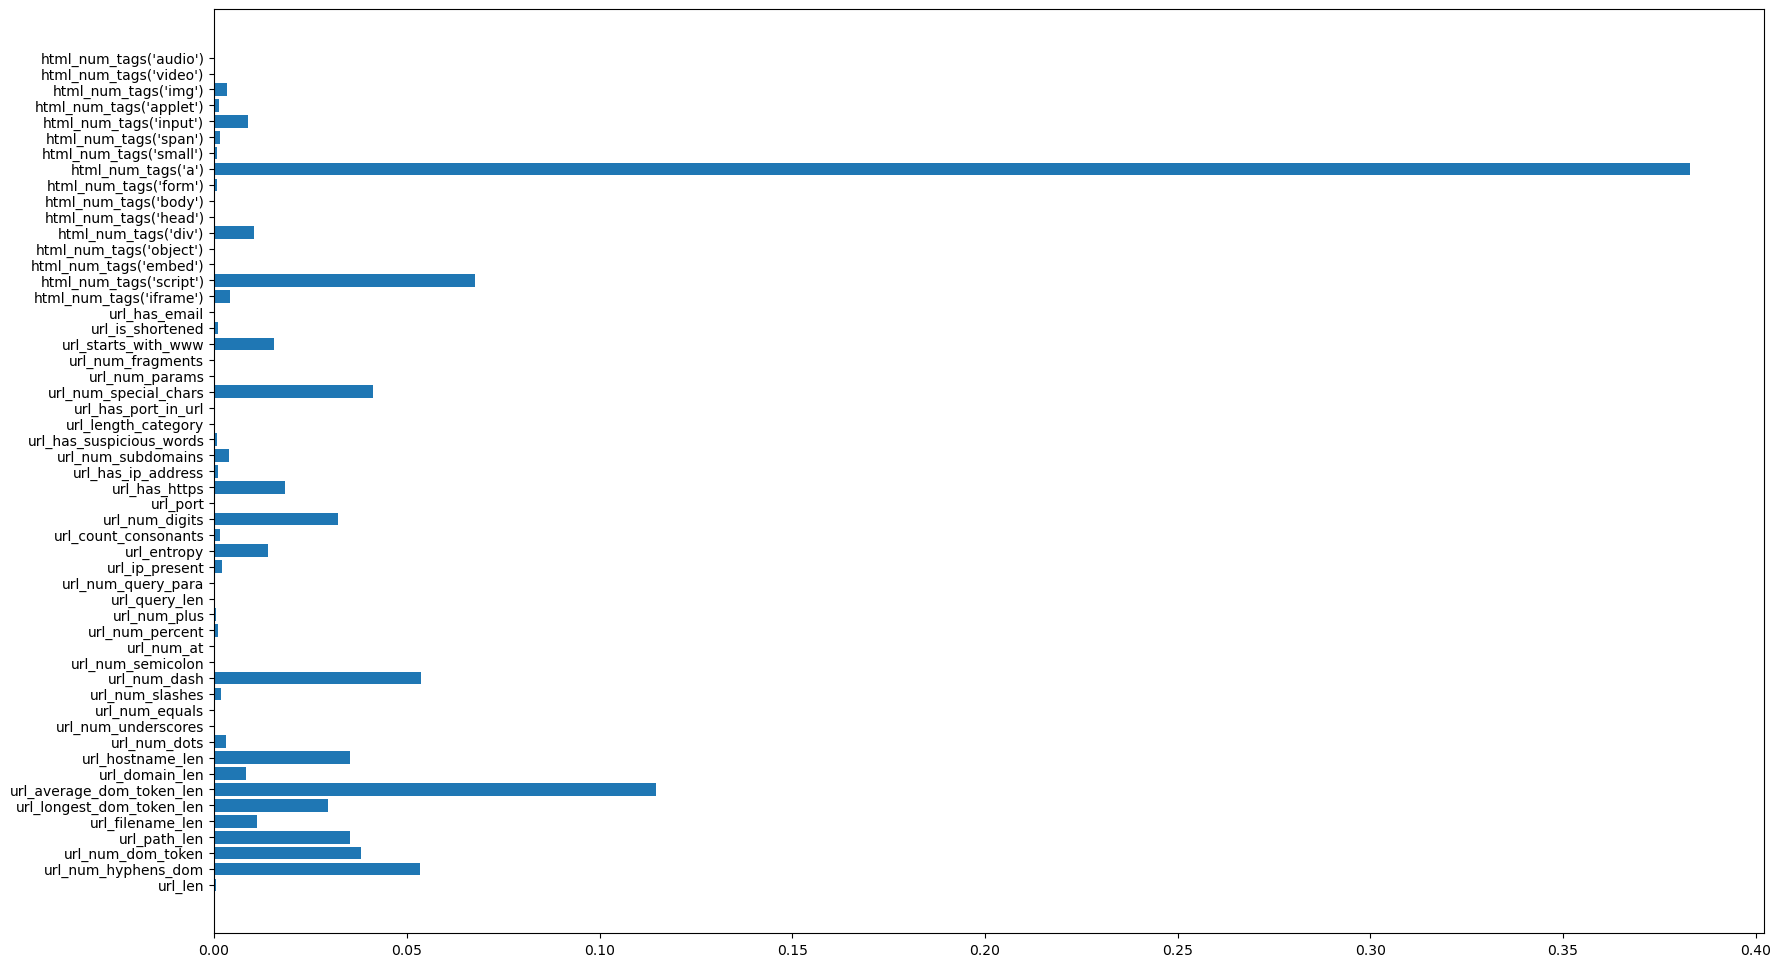

In [38]:
# 1. import
from sklearn.ensemble import GradientBoostingClassifier
# 2.선언
gbc = GradientBoostingClassifier()
# 3. fit()
gbc.fit(train_x,train_y)
# 3. predict()
gbc_pred = gbc.predict(val_x)
# train 및 val 데이터 정확도 확인 : score()
print(gbc.score(train_x, train_y), gbc.score(val_x,val_y))

#Confusion Matrix 확인
confusion = confusion_matrix(val_y, gbc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_dropna_df.columns[:-1],
        width = gbc.feature_importances_)
plt.show()

### AI모델 최적화

### <b>RandomForest, GradientBoosting, SVC GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

# 1. RandomForest 하이퍼파라미터 튜닝
param_grid = [ {'n_estimators':[50, 100, 200, 300], 'max_depth':[5, 10, 20, 30, 50]}]

#rfc = RandomForestClassifier()

rfc_grid = GridSearchCV(rfc,
                        param_grid, # 
                        cv=5, # 교차검증 fold 수
                        scoring='f1', # Classification일때  'accuracy','f1' ...
                                            # Regression 일때 'neg_mean_squared_error','r2'...
                        n_jobs=-1,          
                        verbose=1           # Log 출력 Level 조정
                       )

rfc_grid.fit(train_x, train_y)

rfc_model = rfc_grid.best_estimator_


print('✅ RandomForest 최적 파라미터:', rfc_grid.best_params_) #교차검증으로 얻은 최고 평균 정확도
print('✅ RandomForest 최고 F1-score:', rfc_grid.best_score_) #그 점수를 만든 최적의 하이퍼파라미터 조합

# 2. GradientBoosting 하이퍼파라미터 튜닝
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

gbc_grid = GridSearchCV(
    estimator=gbc,
    param_grid=gb_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

gbc_grid.fit(train_x, train_y)
print('✅ GradientBoosting 최적 파라미터:', gbc_grid.best_params_)
print('✅ GradientBoosting 최고 F1-score:', gbc_grid.best_score_)

# 3. SVC 하이퍼파라미터 튜닝
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

svc = SVC(probability=True)  # stacking에 넣으려면 probability=True 필수

svc_grid = GridSearchCV(
    estimator=svc,
    param_grid=svc_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

svc_grid.fit(train_x, train_y)

print('✅ SVC 최적 파라미터:', svc_grid.best_params_)
print('✅ SVC 최고 F1-score:', svc_grid.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ RandomForest 최적 파라미터: {'max_depth': 20, 'n_estimators': 300}
✅ RandomForest 최고 F1-score: 0.916367257298383
Fitting 5 folds for each of 9 candidates, totalling 45 fits
✅ GradientBoosting 최적 파라미터: {'max_depth': 5, 'n_estimators': 200}
✅ GradientBoosting 최고 F1-score: 0.9253148987497056
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ SVC 최적 파라미터: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
✅ SVC 최고 F1-score: 0.8763017514438687


F1-score의 의미
- F1-score 범위	   /    모델 품질 해석
- 0.90 ~ 1.00     /✅ 매우 우수한 수준 — (상용화 가능)
- 0.80 ~ 0.90     /    실무에서 우수
- 0.70 ~ 0.80     /    보통, 개선 여지 있음

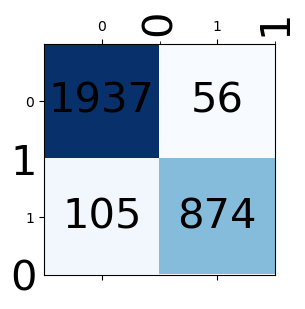

In [41]:
#Confusion Matrix
confusion = confusion_matrix(val_y, rfc_grid_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

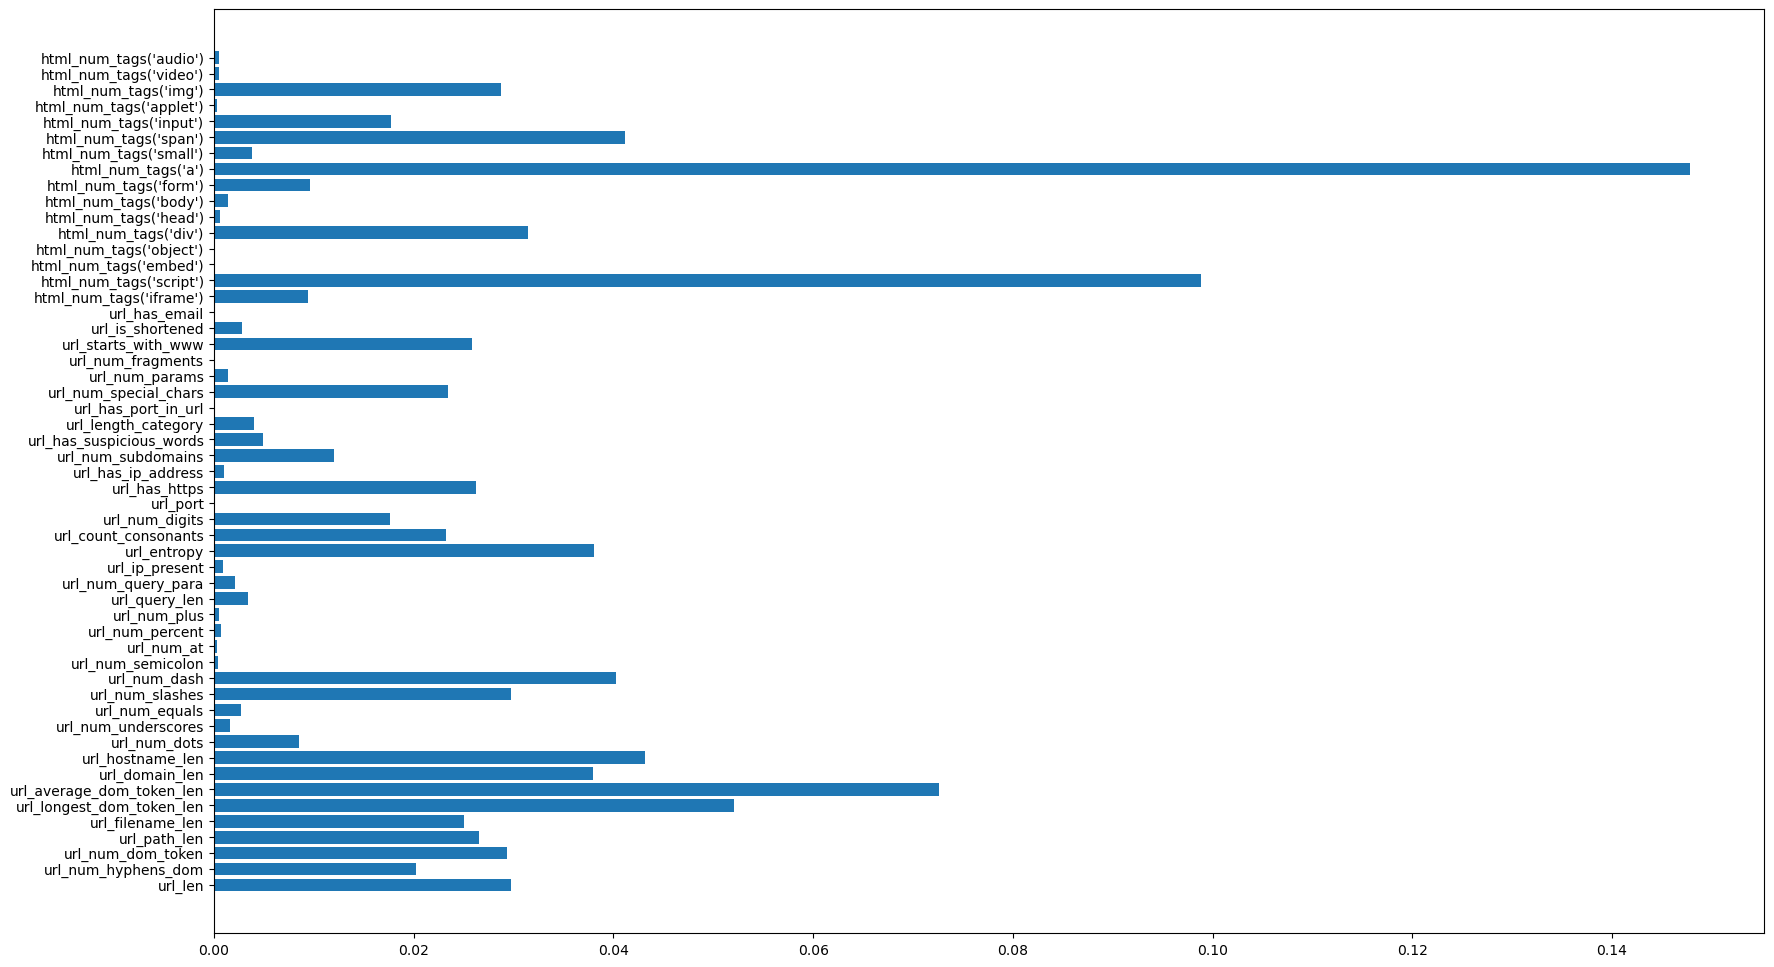

In [42]:
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_dropna_df.columns[:-1],
        width = rfc_model.feature_importances_)
plt.show()

In [43]:
import joblib
#train_df.drop('Result_v1',axis=1,inplace=True)
# 학습 데이터에서 컬럼명 추출 (X가 DataFrame이어야 함)
feature_columns = train_dropna_df.columns.tolist()
print(len(feature_columns))
print(feature_columns)
joblib.dump(feature_columns, 'feature_columns_v2.pkl')


54
['url_len', 'url_num_hyphens_dom', 'url_num_dom_token', 'url_path_len', 'url_filename_len', 'url_longest_dom_token_len', 'url_average_dom_token_len', 'url_domain_len', 'url_hostname_len', 'url_num_dots', 'url_num_underscores', 'url_num_equals', 'url_num_slashes', 'url_num_dash', 'url_num_semicolon', 'url_num_at', 'url_num_percent', 'url_num_plus', 'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy', 'url_count_consonants', 'url_num_digits', 'url_port', 'url_has_https', 'url_has_ip_address', 'url_num_subdomains', 'url_has_suspicious_words', 'url_length_category', 'url_has_port_in_url', 'url_num_special_chars', 'url_num_params', 'url_num_fragments', 'url_starts_with_www', 'url_is_shortened', 'url_has_email', "html_num_tags('iframe')", "html_num_tags('script')", "html_num_tags('embed')", "html_num_tags('object')", "html_num_tags('div')", "html_num_tags('head')", "html_num_tags('body')", "html_num_tags('form')", "html_num_tags('a')", "html_num_tags('small')", "html_nu

['feature_columns_v2.pkl']

In [44]:
#모델 저장
joblib.dump(rfc_model,'best_ml_model_v2.pkl')

['best_ml_model_v2.pkl']

### 모델 시뮬

In [45]:
import numpy as np
simul = np.array([[35.0,0.0,4.0,7.0,6.0,9.0,4.5,21.0,15.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9001530166977125,8.0,17.0,41535.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [46]:
import pandas as pd
import joblib

# 모델 및 피처 목록 불러오기
ml_model = joblib.load('best_ml_model_v2.pkl')
model_features = joblib.load('feature_columns_v2.pkl')  # 정확히 41개
model_features = [col for col in model_features if col != 'repu']
print(model_features)
# # CSV 불러오기
# df = pd.read_csv('Sample_row1.csv')

# # 라벨 컬럼 제거
# for label_col in ['Unnamed: 0','Result_v1', 'repu',"html_num_tags('applet')"]:
#     if label_col in df.columns:
#         df = df.drop(columns=[label_col])


# # 누락된 컬럼 0으로 추가
# for col in model_features:
#     if col not in df.columns:
#         df[col] = 0

# # 1. model_features에 없는 컬럼 찾기
# extra_cols = [col for col in df.columns if col not in model_features]
# # 2. 없애야 할 컬럼 출력
# if extra_cols:
#     print("다음 컬럼은 제거됩니다:", extra_cols)
    

# # 불필요한 컬럼 제거 (model_features에 없는 컬럼)
# df = df.drop(columns=extra_cols, axis=1)  # ✅ 정확한 순서로 41개 컬럼만 유지

# # 컬럼 순서 맞추기 (예측할 때 가장 중요!)
# df = df[model_features]

# # 샘플 선택
# simul = df.sample(n=1, random_state=None)

# 디버깅용 출력
print(f"모델 기대 피처 수: {ml_model.n_features_in_}")
print(f"입력 샘플 피처 수: {simul.shape[1]}")

# 예측 수행
res = ml_model.predict(simul)
proba = ml_model.predict_proba(simul)

pred_class = res[0]
pred_prob = proba[0][ml_model.classes_.tolist().index(pred_class)]

print(f"예측 결과: {pred_class} (확률: {pred_prob*100:.2f}%)")



['url_len', 'url_num_hyphens_dom', 'url_num_dom_token', 'url_path_len', 'url_filename_len', 'url_longest_dom_token_len', 'url_average_dom_token_len', 'url_domain_len', 'url_hostname_len', 'url_num_dots', 'url_num_underscores', 'url_num_equals', 'url_num_slashes', 'url_num_dash', 'url_num_semicolon', 'url_num_at', 'url_num_percent', 'url_num_plus', 'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy', 'url_count_consonants', 'url_num_digits', 'url_port', 'url_has_https', 'url_has_ip_address', 'url_num_subdomains', 'url_has_suspicious_words', 'url_length_category', 'url_has_port_in_url', 'url_num_special_chars', 'url_num_params', 'url_num_fragments', 'url_starts_with_www', 'url_is_shortened', 'url_has_email', "html_num_tags('iframe')", "html_num_tags('script')", "html_num_tags('embed')", "html_num_tags('object')", "html_num_tags('div')", "html_num_tags('head')", "html_num_tags('body')", "html_num_tags('form')", "html_num_tags('a')", "html_num_tags('small')", "html_num_t

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 머신러닝모델 성능 개선 
앙상블 - Stacking( 여러 모델의 예측 결과를 기반으로 또 다른 모델이 최종 예측 ) 기법사용

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Base 모델들
estimators = [
('rf', RandomForestClassifier(max_depth= 20, n_estimators=300, random_state=42)),  # RandomForest - 노이즈에 강함, 안정적
('gb', GradientBoostingClassifier(max_depth= 5,n_estimators=200, random_state=42)),# GradientBoosting - 약한 학습기를 차곡차곡 쌓아 강력한 성능 도달
('svc', SVC(C=10,gamma = 'scale',kernel='linear',probability=True))                                                     # SVC - 결정 경계가 뚜렷함, 고차원 분리 잘함(비선형 분류기)
]

# 최종 메타모델
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stacking_model.fit(train_x, train_y)
print("스태킹모델 정확도:", stacking_model.score(val_x, val_y))


### 딥러닝 모델링

### 딥러닝모델 최적화 문제 발견
- 정규화 시도해서 머신러닝모델부터 재학습 하지만, 오히려 성능이 떨어져 머신러닝 모델에서는 적용 X

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x_scaled = scaler.fit_transform(train_x)
val_x_scaled = scaler.transform(val_x)


### 딥러닝 모델
---
- 손실함수는 'binary_crossentropy'를 사용
- 각 에포크마다 'accuracy'로 모델을 평가하며, 최적화 기법은 'adam'을 사용
- 하이퍼파라미터 epochs : 30, batch_size : 64 으로 설정
- 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용
- EarlyStopping을 사용하여 val_loss를 보고 10회의 대기 후 성능이 향상되지 않으면 종료하며, 가장 낮은 검증 손실을 낸 모델 파라미터로 복구
- ModelCheckpoint를 활용하여 동일 폴더에 'best_model.h5'라는 이름의 가장 좋은 성능의 모델만 저장
- 학습정보는 history 변수에 저장
---

#### 모델 흐름도
### Input - Dense128(relu) - Dropout(0.2)- Dense48(relu) - Dropout(0.3) - Dense(1) - Output
optimizer = Adam(learning_rate=0.00326)

### Optuna
- 강력한 베이지안 최적화 기반 하이퍼파라미터 튜닝 라이브러리

- 케라스, PyTorch 등 다양한 프레임워크 지원

- 조건문, 복잡한 파라미터 공간도 탐색 가능

In [49]:
!pip install optuna

In [ ]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm
import numpy as np

# tqdm 콜백 클래스 정의
class TqdmCallback:
    def __init__(self, n_trials):
        self.pbar = tqdm(total=n_trials, desc="Optuna Trial")

    def __call__(self, study, trial):
        self.pbar.update(1)
        if study.best_trial == trial:
            self.pbar.set_postfix({'best_val_acc': f"{trial.value:.4f}"})

def create_model(trial):
    model = Sequential()
    input_dim = train_x_scaled.shape[1]
    n_layers = trial.suggest_int('n_layers', 1, 4)
    
    for i in range(n_layers):
        units = trial.suggest_int(f'units_l{i}', 16, 512, step=16)
        dropout_rate = trial.suggest_float(f'dropout_l{i}', 0.0, 0.5, step=0.05)
        
        if i == 0:
            model.add(Dense(units=units, activation='relu', input_shape=(input_dim,)))
        else:
            model.add(Dense(units=units, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    lr = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    optimizer = Adam(learning_rate=lr)
    
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def objective(trial):
    model = create_model(trial)
    es = EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)
    
    history = model.fit(train_x_scaled, train_y,
                        validation_data=(val_x_scaled, val_y),
                        epochs=50,
                        batch_size=trial.suggest_categorical('batch_size', [32, 64, 128]),
                        callbacks=[es],
                        verbose=0)
    
    val_acc = max(history.history['val_accuracy'])
    return val_acc

n_trials = 100
tqdm_callback = TqdmCallback(n_trials=n_trials)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=n_trials, callbacks=[tqdm_callback])

print("\nBest trial:")
trial = study.best_trial
print(f"  Validation Accuracy: {trial.value:.4f}")
print("  Best hyperparameters:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
import numpy as np

# 1. 클래스 불균형 보정용 가중치 계산
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(train_y),
                                                  y=train_y)
class_weights = dict(enumerate(class_weights))

# 2. 모델 정의 (은닉층 2개, Dropout 적용)
model = Sequential([
    Dense(208, activation='relu', input_shape=(train_x_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(320, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.summary()

# 3. 컴파일 (Adam 옵티마이저, learning_rate 조정)
model.compile(optimizer=Adam(learning_rate=0.0045),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. 콜백 설정 (EarlyStopping, ModelCheckpoint)
es = EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)
cp = ModelCheckpoint("best_ml_model.keras", monitor='val_loss', save_best_only=True)

# 5. 모델 학습 (class_weight 반영)
history = model.fit(train_x_scaled, train_y,
                    validation_data=(val_x_scaled, val_y),
                    epochs=50,
                    batch_size=64,
                    class_weight=class_weights,
                    callbacks=[es, cp],
                    verbose=1)

# 6. 검증 데이터로 예측 및 평가
val_pred_prob = model.predict(val_x_scaled)
best_thresh = 0.5  # 임계값 최적화는 따로 진행 가능

val_pred_label = (val_pred_prob > best_thresh).astype(int)

print(classification_report(val_y, val_pred_label, target_names=['benign', 'malicious']))


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_163"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_477 (Dense)               │ (None, 208)            │        11,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_300 (Dropout)           │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_478 (Dense)               │ (None, 128)            │        26,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_301 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_479 (Dense)               │ (None, 320)            │        41,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_302 (Dropout)           │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_480 (Dense)               │ (None, 1)              │           321 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,585 (310.88 KB)

 Trainable params: 79,585 (310.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.3430 - val_accuracy: 0.8745 - val_loss: 0.2930
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8888 - loss: 0.2597 - val_accuracy: 0.8869 - val_loss: 0.2812
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8985 - loss: 0.2352 - val_accuracy: 0.9058 - val_loss: 0.2523
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9038 - loss: 0.2301 - val_accuracy: 0.8954 - val_loss: 0.2709
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9093 - loss: 0.2133 - val_accuracy: 0.9017 - val_loss: 0.2741
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9078 - loss: 0.2176 - val_accuracy: 0.8839 - val_loss: 0.2960
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9077 - loss: 0.2143 - val_accuracy: 0.9051 - val_loss: 0.2425
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9096 - loss: 0.2127 - val_accuracy: 0.

- Epoch 30:
- train_accuracy: 93.34% (학습정확도)
- val_accuracy:   92.73% (검증정확도) 
- train_accuracy와 val_accuracy의 차이가 0.05 이내 (즉, 5%p 이내면 괜찮음)
- train_loss:     0.1640
- val_loss:       0.2037
- val_loss - train_loss: (0.0397)

### 딥러닝 모델의 성능 평가
---
Matplotlib 라이브러리를 활용해서 학습 acc와 검증 acc를 그래프로 표시
- 1개의 그래프에 학습 acc과 검증 acc 2가지를 모두 표시
- 위 2가지 각각의 범례를 'acc', 'val_acc'로 표시
- 그래프의 타이틀은 'Model Accuracy'로 표시
- X축에는 'Epochs'라고 표시하고 Y축에는 'Accuracy'라고 표시
---

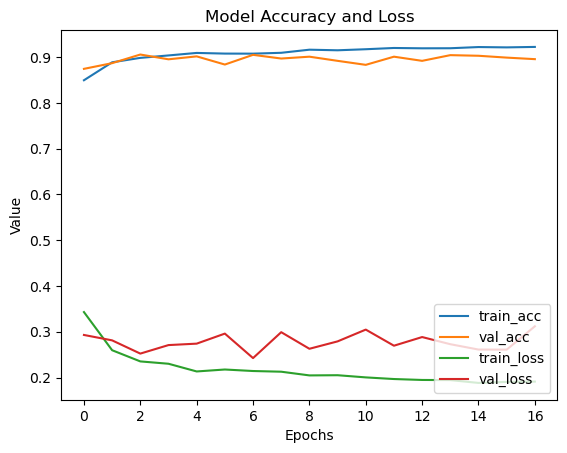

In [ ]:
# 학습 곡선 시각화 (accuracy, val_accuracy, loss, val_loss)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(['train_acc', 'val_acc', 'train_loss', 'val_loss'], loc='lower right')
plt.show()

✅ 이상적인 그래프 모양
train_accuracy와 val_accuracy가 비슷한 속도로 증가하면서

val_accuracy가 점점 높아지고 (또는 안정적으로 유지되고)

두 그래프 간의 간격이 작고 (train_acc - val_acc 차이 < 0.05 정도)

마지막 epochs쯤에서 성능이 plateau(평탄) 해지는 형태

### 딥러닝 모델을 불러와서 주어진 데이터로 시뮬레이션
---
- tensorflow.keras.models의 load_model을 사용하여 최적의 모델을 불러옵니다.
- 주어진 시뮬레이션 데이터에 대해 예측 결과를 구하고 반올림하여 정수로 출력
---

In [ ]:
sim1 = np.array([[35.0,0.0,4.0,7.0,6.0,9.0,4.5,21.0,15.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9001530166977125,8.0,17.0,41535.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [ ]:
# 여기에 답안코드를 작성하세요.
from tensorflow.keras.models import load_model

bmd = load_model('best_ml_model.keras')
res_1 = bmd.predict(sim1)
# res_2 = bmd.predict(sim2)
# res_3 = bmd.predict(sim3)
print(np.round(res_1))
# print(np.round(res_2))
# print(np.round(res_3))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.]]


In [ ]:
pred_prob = bmd.predict(val_x_scaled)
pred_label = (pred_prob > 0.5).astype(int)

# 예측 결과 비교
comparison = pd.DataFrame({
    'real': val_y,
    'pred_prob': pred_prob.flatten(),
    'pred_label': pred_label.flatten()
})
print(comparison.head(20))


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
      real     pred_prob  pred_label
1095     0  5.273618e-04           0
9275     1  8.209776e-01           1
1366     1  5.698998e-01           1
8326     0  6.348140e-01           1
4914     1  9.839835e-01           1
4302     1  5.054313e-01           1
7767     0  3.916043e-01           0
2097     0  5.506240e-01           1
6313     0  9.829813e-02           0
2163     0  3.190100e-02           0
4176     1  9.998384e-01           1
8264     0  4.294686e-02           0
560      1  9.999992e-01           1
7469     1  9.559718e-01           1
8919     0  3.224510e-02           0
3277     0  2.463530e-07           0
88       1  9.999990e-01           1
5897     1  8.403779e-01           1
2167     0  8.270581e-01           1
5782     0  1.739015e-05           0


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

probs = model.predict(val_x_scaled).flatten()

best_thresh = 0.5
best_f1 = 0

for thresh in np.arange(0.1, 0.9, 0.05):
    preds = (probs > thresh).astype(int)
    score = f1_score(val_y, preds)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print(f"최적 임계값: {best_thresh:.2f}, 최고 F1-score: {best_f1:.4f}")

final_preds = (probs > best_thresh).astype(int)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
최적 임계값: 0.50, 최고 F1-score: 0.8600
